In [1]:
!pip install mglearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
import mglearn

# 경고메시지 무시
import warnings
warnings.filterwarnings(action = 'ignore')

# 데이터셋 로딩

In [92]:
from sklearn.datasets import load_iris

In [93]:
iris = load_iris()

## 데이터셋 탐색

In [94]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [83]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [84]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [85]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [86]:
iris['data'].shape

(150, 4)

In [87]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = iris.target

In [88]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [89]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [90]:
df['species'].unique()

array([0, 1, 2])

## 훈련세트와 테스트세트로 분리

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 42)

In [96]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## 분류 알고리즘 : 의사결정트리(DecisionTreeClassifier)
    - 분류와 회귀에 사용되는 지도학습 알고리즘
    - 데이터 특성으로 부터 추론된 결정규칙을 통해 값을 예측
    - if-then-else 결정 규칙을 통해 데이터 학습
    - 트리의 깊이가 깊을수록 복잡한 모델이 된다.
    - 결정트리의 장점
        이해와 해석이 쉽다.
        시각화가 용이하다
        많은 데이터의 전처리가 필요하지 않다
        수치형과 범주형 데이터 모두를 다룰 수 있다.

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 트리 구조를 시작화 하는 패키지 gaphviz

In [98]:
import graphviz

In [99]:
from sklearn.tree import export_graphviz

# export_graphviz(모델객체, 출력파일명, 결정트리클래스 명칭, 결정트리피처 명칭, 옵션)
export_graphviz(dtree, out_file = 'tree.dot', class_names = iris.target_names,
               feature_names = iris.feature_names, impurity = True, filled = True)

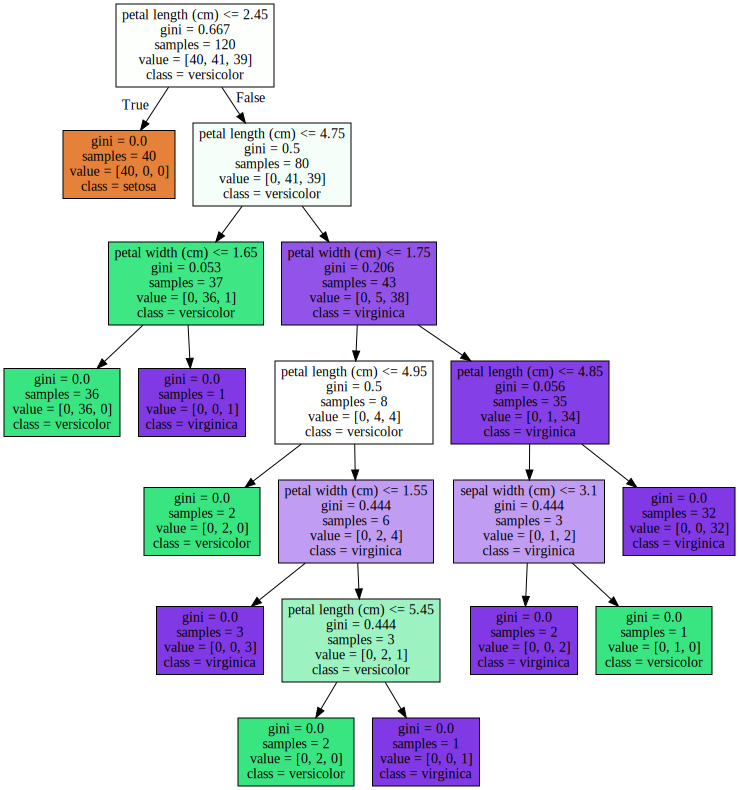

In [100]:
# open(filename, mode)
# mode : r(default), w, a
# graphviz 파이썬 래퍼 모듈을 호출해 결정트리 규칙을 시각화한다.
with open('tree.dot') as f:
    dot_graph = f.read()
    
src = graphviz.Source(dot_graph)
src

In [101]:
# 결정트리르 pdf 파일로 생성 : Source.gv, Source.gv.pdf 두개의 파일이 생성된다.
src.view()

'Source.gv.pdf'

In [102]:
## p.186 하이퍼파라미터값 참고

In [103]:
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

1.0
1.0


## DecisionTree의 중요 하이퍼 파라미터 조정

In [106]:
model = DecisionTreeClassifier(min_samples_split = 4, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=42)

In [107]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
1.0


## feature 별 결정 트리 알고리즘의 중요도

In [108]:
model.feature_importances_

array([0.        , 0.        , 0.92015135, 0.07984865])

### feature 별 중요도 값 매칭

In [109]:
for name, value in zip(iris.feature_names, model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.920
petal width (cm) : 0.080


### feature별 중요도 시각화

<AxesSubplot:>

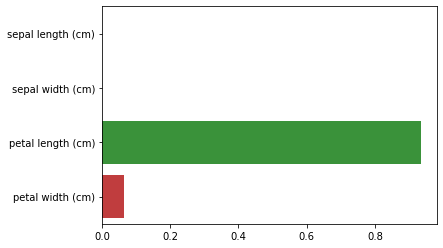

In [142]:
import seaborn as sns
sns.barplot(model.feature_importances_,iris.feature_names)

## 가지치기(Prunning)
1. Tree pruning : 의사결정 트리 모델의 과적합(Overfitting)을 줄이고, 일반화 가능성을 증대시킬 수 있는 subtree를 찾는 과정
2. 가지치기 방법
 - 교차검증: cross-validation
 - independent validation set
3. Prunning Logic
 - 가지치기 과정에서는 트리 해당 데이터셋에 과도하게 최적화되지 않도록 결정트리의 최대깊이를 제한하고. leaf node의 최대 개수를 제한다.
 - 노드를 분할시키기 위해 필요한 '최소한의 데이터 갯수를 지정한다.

In [111]:
# 결정트리에서 가지치기를 하는 가장 간단한 방법은 트리의 깊이를 지정하는 것이다.
model = DecisionTreeClassifier(min_samples_split = 3, random_state = 42)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0


In [112]:
# 결정트리에서 가지치기를 하는 가장 간단한 방법은 트리의 깊이를 지정하는 것이다.
model = DecisionTreeClassifier(min_samples_split = 6, random_state = 42)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
1.0


In [113]:
model = DecisionTreeClassifier(max_depth = 3, min_samples_split = 6, random_state = 42)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9583333333333334
1.0


### 교차검증

In [114]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X_train, y_train)
scores

{'fit_time': array([0.0033257 , 0.00097203, 0.00199509, 0.00099707, 0.00099659]),
 'score_time': array([0.00066137, 0.0012548 , 0.        , 0.        , 0.00099659]),
 'test_score': array([0.95833333, 1.        , 0.83333333, 0.95833333, 0.91666667])}

In [115]:
np.mean(scores['test_score'])

0.9333333333333333

### 그리드 서치(Grid Search)
- 결정 트리의 하이퍼파라미터 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾는 작업
- 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 고르면 된다.

In [137]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 42)  ## 모델 리셋

params = {
    'max_depth' : [2, 3, 4, 5, 6, None],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(model, param_grid = params, cv = 3, refit = True, n_jobs = -1) ## cv(교차검증 : 분할)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [138]:
model = gs.best_estimator_
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9583333333333334
1.0


In [139]:
# 그리드 서치를 통해 찾은 최적의 매개변수
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9499999999999998


In [140]:
# 최상의 교차검증 점수
np.max(gs.cv_results_['mean_test_score'])

0.9499999999999998

In [141]:
model = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2,min_samples_leaf = 1, random_state = 42)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

## 그리드서치와 모델의 출력된 결과가 다른이유, 작성중에 사용된 seed값이 다르게 줬기 때문입니다.

0.9583333333333334
1.0
